## Load and Clean the Data

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Define the tickers and the date range
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2025-01-31'

# Fetch the data
data = yf.download(tickers, start=start_date, end=end_date)

# Extract the 'Close' prices
close_prices = data['Close']

# Check for missing values
print(close_prices.isnull().sum())

# Handle missing values (e.g., forward fill)
close_prices.fillna(method='ffill', inplace=True)

# Ensure all columns have appropriate data types
print(close_prices.dtypes)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


Ticker
BND     0
SPY     0
TSLA    0
dtype: int64
Ticker
BND     float64
SPY     float64
TSLA    float64
dtype: object


/tmp/ipykernel_94760/2884662836.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close_prices.fillna(method='ffill', inplace=True)
/tmp/ipykernel_94760/2884662836.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices.fillna(method='ffill', inplace=True)


## Exploratory Data Analysis (EDA)

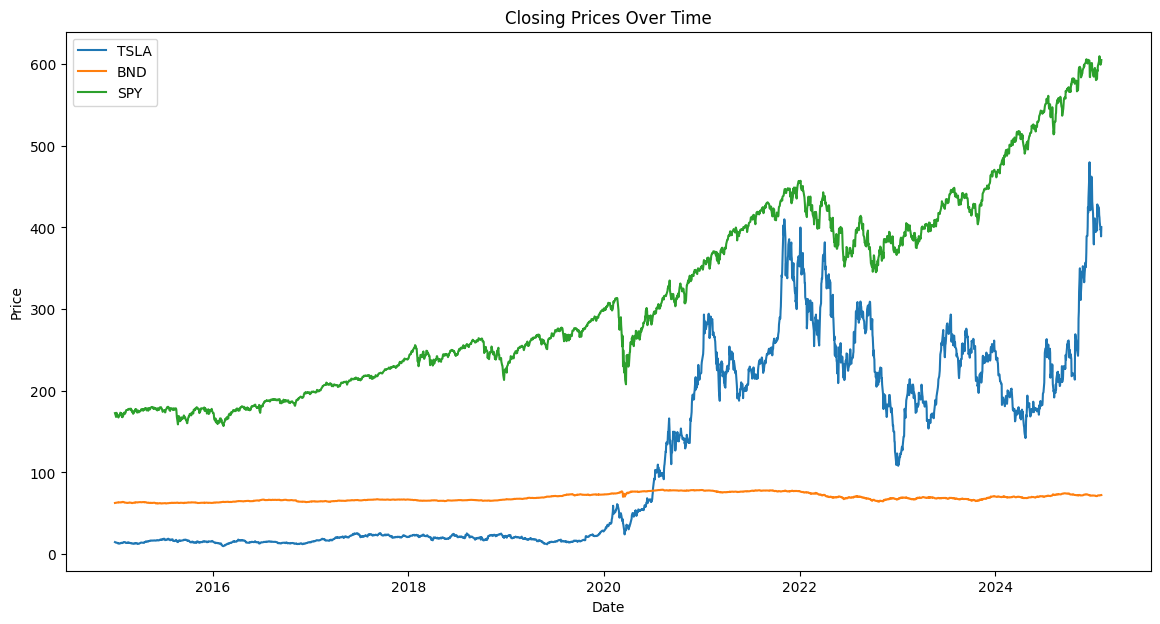

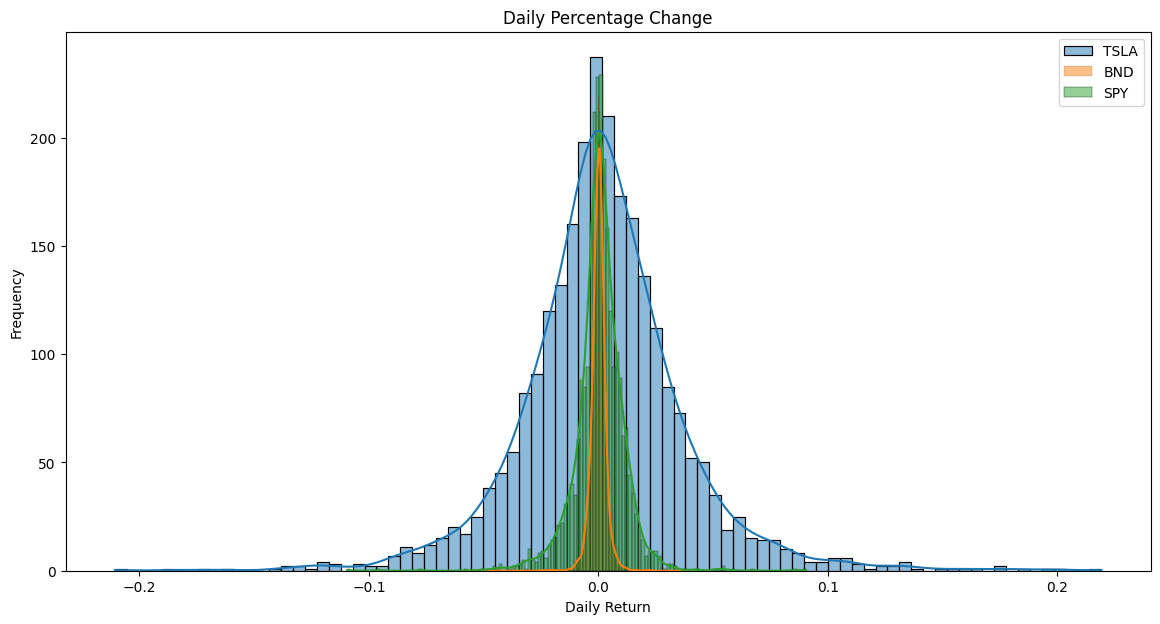

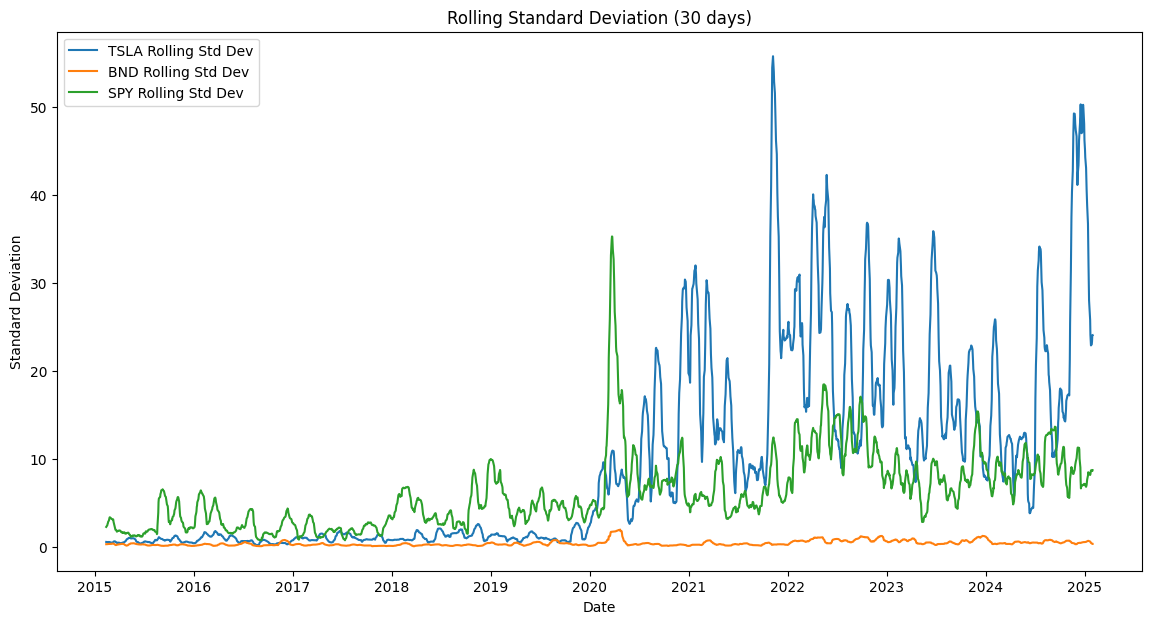

In [2]:
# Visualize the closing price over time
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(close_prices[ticker], label=ticker)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate and plot the daily percentage change
daily_returns = close_prices.pct_change().dropna()

plt.figure(figsize=(14, 7))
for ticker in tickers:
    sns.histplot(daily_returns[ticker], kde=True, label=ticker)
plt.title('Daily Percentage Change')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Analyze volatility by calculating rolling means and standard deviations
rolling_mean = close_prices.rolling(window=30).mean()
rolling_std = close_prices.rolling(window=30).std()

plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(rolling_std[ticker], label=f'{ticker} Rolling Std Dev')
plt.title('Rolling Standard Deviation (30 days)')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()

## Decompose the Time Series


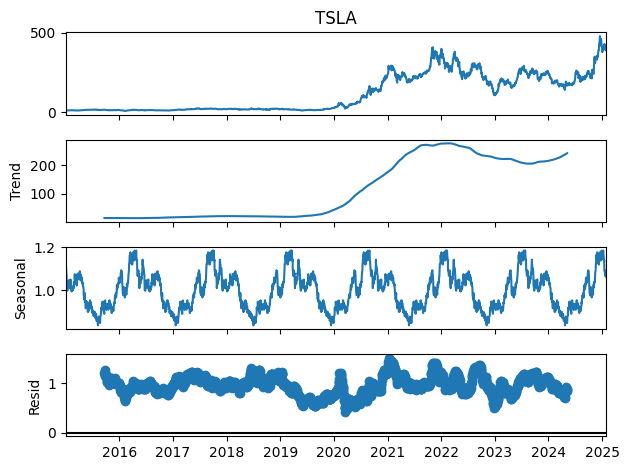

In [3]:
# Decompose the time series for TSLA
result = seasonal_decompose(close_prices['TSLA'], model='multiplicative', period=365)

# Plot the decomposition
result.plot()
plt.show()

## Document Key Insights

In [5]:
# Calculate Value at Risk (VaR) and Sharpe Ratio
def calculate_var_sharpe(returns, confidence_level=0.05):
    var = returns.quantile(confidence_level)
    sharpe_ratio = returns.mean() / returns.std()
    return var, sharpe_ratio

for ticker in tickers:
    var, sharpe_ratio = calculate_var_sharpe(daily_returns[ticker])
    print(f'{ticker} - VaR: {var:.4f}, Sharpe Ratio: {sharpe_ratio:.4f}')

TSLA - VaR: -0.0514, Sharpe Ratio: 0.0542
BND - VaR: -0.0048, Sharpe Ratio: 0.0182
SPY - VaR: -0.0167, Sharpe Ratio: 0.0502
